## 저장한 학습 데이타를 이용한 예측
### mnist

In [1]:
import keras
from keras import datasets
from keras.utils import np_utils
import pickle
import matplotlib.pyplot as plt
import numpy as np

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

In [3]:
model= keras.models.load_model('cnn_mnist.h5') #학습데이타 loading

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
import matplotlib
font_name = matplotlib.font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
matplotlib.rc('font', family=font_name)

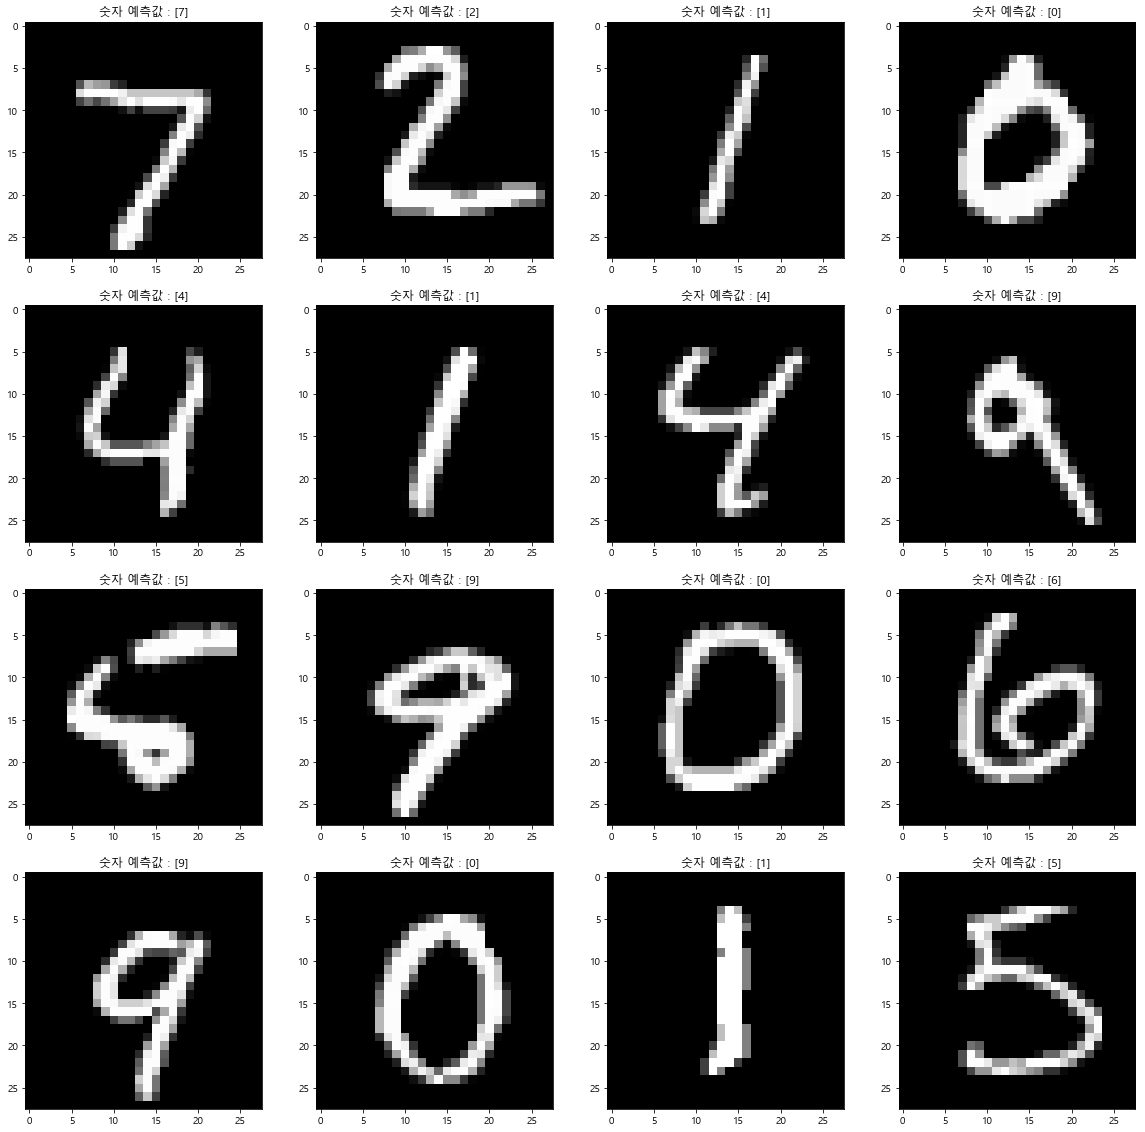

In [6]:
fig = plt.figure(figsize=(20,20))
for i in range(16):
    plt_temp = fig.add_subplot(4,4,i+1, title=("숫자 예측값 : {}".format(model.predict_classes(x_test[i].reshape(1, 28, 28, 1)/255))))
    plt_temp.imshow(x_test[i], cmap='gray')

### CIFRA10

In [7]:
model= keras.models.load_model('cnn_cifra10.h5')
history = pickle.load(open('cnn_cifra10_history.npy', 'rb'))
scaler = pickle.load(open('cnn_cifra10_scaler.npy', 'rb'))


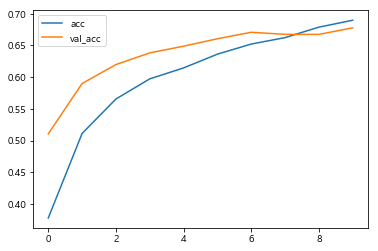

In [8]:
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label='val_acc')
plt.legend()

In [9]:
(X, y), (X_origin_test, y_test) = datasets.cifar10.load_data()

In [10]:
X_test = np.copy(X_origin_test)

In [11]:
X_test = scaler.transform(X_test.reshape(X_test.shape[0], -1)).reshape(X_test.shape)

In [12]:
model.evaluate(X_test, np_utils.to_categorical(y_test, 10))
#[0.9137110391616822, 0.682]    scaler 적용
#7.613919780731202, 0.5193    scaler 미적용

10000/10000 [==============================] - 14s 1ms/step


[0.9137110391616822, 0.682]

In [13]:
answer_dict = { 0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}

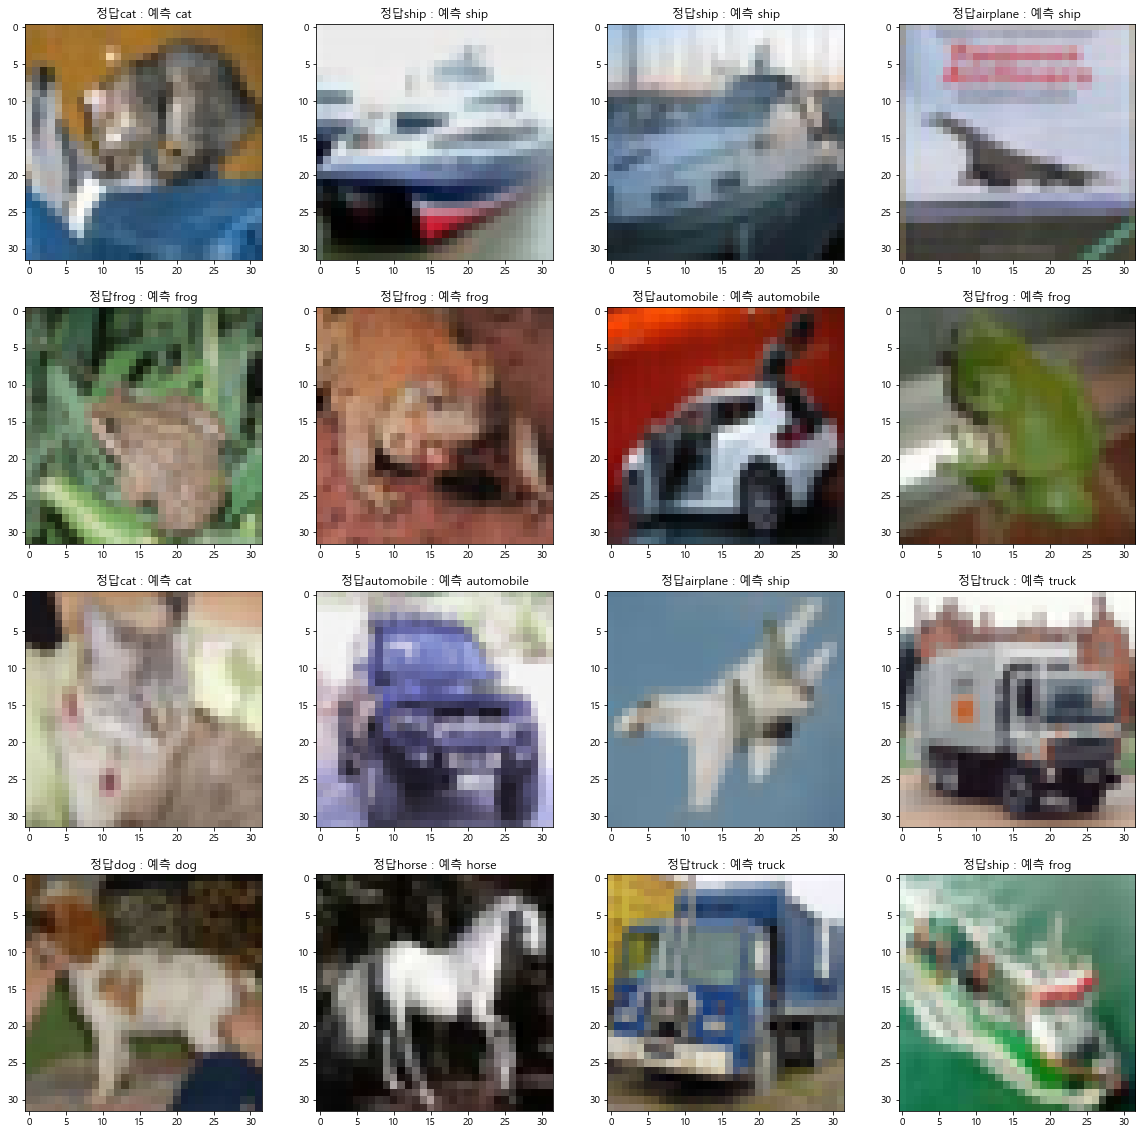

In [14]:
fig = plt.figure(figsize=(20,20))
for i in range(16):
    pred = model.predict_classes(X_test[i].reshape(1,32,32,3))
    plt_temp = fig.add_subplot(4,4,i+1, title=("정답{} : 예측 {}".format(answer_dict.get(y_test[i][0]) , answer_dict.get(pred[0]))))
    plt_temp.imshow(X_origin_test[i], cmap='gray')